<a href="https://colab.research.google.com/github/Ion13135/Business_Analysis.ipynb-/blob/main/Business_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


df_sales = pd.read_csv("supermarket_sales.csv")
df_sales.head()

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
df_sales.info()
df_sales.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_id       1000 non-null   object 
 1   branch           1000 non-null   object 
 2   city             1000 non-null   object 
 3   customer_type    1000 non-null   object 
 4   gender_customer  1000 non-null   object 
 5   product_line     1000 non-null   object 
 6   unit_cost        1000 non-null   float64
 7   quantity         1000 non-null   int64  
 8   5pct_markup      1000 non-null   float64
 9   revenue          1000 non-null   float64
 10  date             1000 non-null   object 
 11  time             1000 non-null   object 
 12  payment_method   1000 non-null   object 
 13  cogs             1000 non-null   float64
 14  gm_pct           1000 non-null   float64
 15  gross_income     1000 non-null   float64
 16  rating           1000 non-null   float64
dtypes: float64(7), 

,0
invoice_id,0
branch,0
city,0
customer_type,0
gender_customer,0
product_line,0
unit_cost,0
quantity,0
5pct_markup,0
revenue,0


In [3]:
df_sales.info()
df_sales.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_id       1000 non-null   object 
 1   branch           1000 non-null   object 
 2   city             1000 non-null   object 
 3   customer_type    1000 non-null   object 
 4   gender_customer  1000 non-null   object 
 5   product_line     1000 non-null   object 
 6   unit_cost        1000 non-null   float64
 7   quantity         1000 non-null   int64  
 8   5pct_markup      1000 non-null   float64
 9   revenue          1000 non-null   float64
 10  date             1000 non-null   object 
 11  time             1000 non-null   object 
 12  payment_method   1000 non-null   object 
 13  cogs             1000 non-null   float64
 14  gm_pct           1000 non-null   float64
 15  gross_income     1000 non-null   float64
 16  rating           1000 non-null   float64
dtypes: float64(7), 

,0
invoice_id,0
branch,0
city,0
customer_type,0
gender_customer,0
product_line,0
unit_cost,0
quantity,0
5pct_markup,0
revenue,0


In [4]:
df_sales.drop_duplicates(inplace=True)

In [8]:
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales['Day'] = df_sales['date'].dt.day_name()
df_sales['Month'] = df_sales['date'].dt.month

In [9]:
# venit total pr magazin
df_sales.groupby('branch')['revenue'].sum()

,revenue
branch,
A,106200.3705
B,106197.6720
C,110568.7065


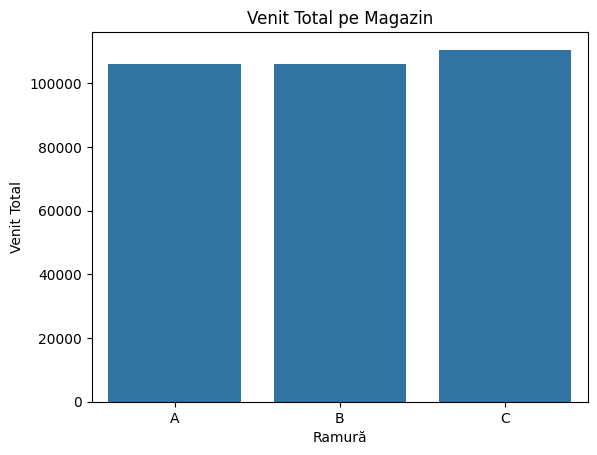

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data: calculate total revenue per branch
df_branch_revenue = df_sales.groupby('branch')['revenue'].sum().reset_index()
df_branch_revenue.columns = ['branch', 'total_revenue']

# Plot the total revenue per branch
sns.barplot(x='branch', y='total_revenue', data=df_branch_revenue)
plt.title("Venit Total pe Magazin")
plt.xlabel("Ramură")
plt.ylabel("Venit Total")
plt.show()

In [11]:
df_sales.groupby('product_line')['revenue'].sum().sort_values(ascending=False)

,revenue
product_line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


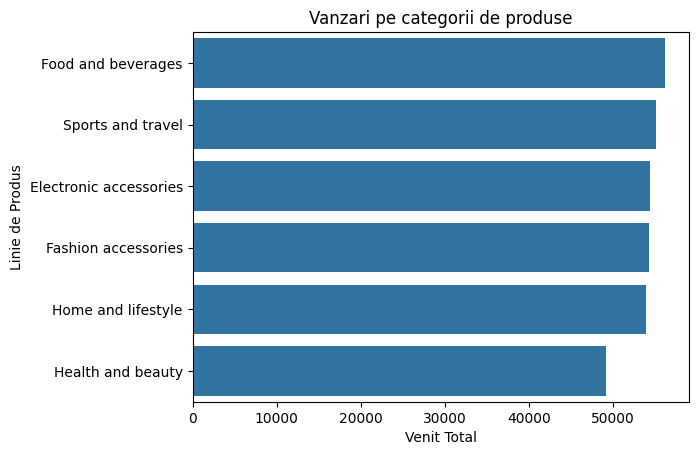

In [12]:
df_product_revenue = df_sales.groupby('product_line')['revenue'].sum().reset_index()
df_product_revenue = df_product_revenue.sort_values(by='revenue', ascending=False)

sns.barplot(
    x='revenue',
    y='product_line',
    data=df_product_revenue
)
plt.title("Vanzari pe categorii de produse")
plt.xlabel("Venit Total")
plt.ylabel("Linie de Produs")
plt.show()

In [13]:
if 'date' in df_sales.columns:
    df_sales['date'] = pd.to_datetime(df_sales['date'])
    df_sales['Day'] = df_sales['date'].dt.day_name()

df_sales.groupby('Day')['revenue'].sum().sort_values(ascending=False)

,revenue
Day,
Saturday,56120.8095
Tuesday,51482.2455
Thursday,45349.2480
Sunday,44457.8925
Friday,43926.3405
Wednesday,43731.1350
Monday,37899.0780


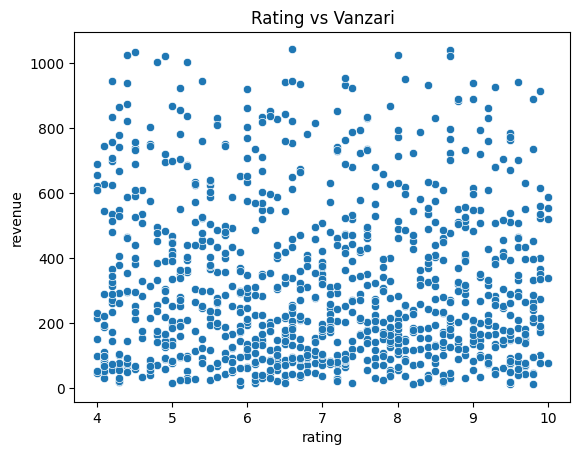

In [14]:
sns.scatterplot(x='rating', y='revenue', data=df_sales)
plt.title('Rating vs Vanzari')
plt.show()

- Magazinul cu cele mai mari venituri este Branch X.
- Categoria cea mai profitabila este Product line Y.
- Cele mai bune vanzari apar in ziua Z.
- Exista o corelatie slaba/moderata intre rating si vanzari.